# Project: Gold Ore Recovery

## Introduction

For this project, we're looking into the gold mining sector for Zyfra, a company that develops efficiency solutions for heavy industry. _We need to prepare a machine learning model that can predict the amount of gold recovered from gold ore._ The goal of the model is to help optimize gold production and eliminate unprofitable parameters.

The project steps are as follows:

1. Prepare the data
2. Perform data analysis
3. Develop and train the model

## Data overview

In [46]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [47]:
# Import datasets
df_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
df_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv') # contains no targets

### Study the data

In [48]:
display(df_recovery_train.head(10))
display(df_recovery_test.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [49]:
print(df_recovery_train.info())
print(df_recovery_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [50]:
df_recovery_train[['final.output.recovery', 'rougher.output.recovery']].describe()

,final.output.recovery,rougher.output.recovery
count,15339.000000,14287.000000
mean,67.213166,82.394201
std,11.960446,15.096808
min,0.000000,0.000000
25%,62.625685,79.818372
50%,67.644601,85.235997
75%,72.824595,90.131691
max,100.000000,100.000000


We inspect the training and test sets respectively. We note that the former has 34 additional features. This is expect as some parameters were measured and/or calculated much later. In addition, we've been already told that the test set as is doesn't contain targets.

### Check recovery calculation

Function parameters:

* C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery) / after purification (for finding the final concentrate recovery): `rougher.output.concentrate_au` <!--`secondary_cleaner.output.concentrate_au` -->
* F — share of gold in the feed before flotation (for finding the rougher concentrate recovery) / in the concentrate right after flotation (for finding the final concentrate recovery): `rougher.input.feed_au` <!-- `rougher.output.concentrate_au`) -->
* T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery) / after purification (for finding the final concentrate recovery): `rougher.output.tail_au` <!-- `secondary_cleaner.output.concentrate_au`) -->

In [51]:
# Simulate the process of recovering gold from ore
def calculate_recovery(C, F, T):
    return ((C * (F - T)) / (F * (C - T))) * 100

In [52]:
# Use the training set to calculate recovery for `rougher.output.recovery`
df_recovery_train = df_recovery_train.dropna(subset=['rougher.output.recovery'])

df_recovery_train['rougher.output.calculated_recovery'] = calculate_recovery(df_recovery_train['rougher.output.concentrate_au'], df_recovery_train['rougher.input.feed_au'], df_recovery_train['rougher.output.tail_au'])
display(df_recovery_train[['rougher.output.recovery', 'rougher.output.calculated_recovery']].head(10))

mae = mean_absolute_error(df_recovery_train['rougher.output.recovery'], df_recovery_train['rougher.output.calculated_recovery'])
print(f'Recovery calculation MAE: {mae}')

,rougher.output.recovery,rougher.output.calculated_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


Recovery calculation MAE: 9.303415616264301e-15


Here we check to make sure our recovery is being calculated correctly. We create a recovery calculation function and use the training set on `rougher.output.recovery`. We compare the results (`rougher.output.calculated_recovery`) against the existing recovery values, and calculate a MAE that is small enough that we're happy to accept existing recovery values.

### Features comparision (training vs. test set)

In [53]:
# Find common features between training and test sets
common_features = list(set(df_recovery_train.columns).intersection(set(df_recovery_test.columns)))
common_features.sort()
display(common_features)

['date',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

In [54]:
# Find features in the training set missing from the test set
train_only_features = list(set(df_recovery_train.columns) - set(df_recovery_test.columns))
train_only_features.sort()
display(train_only_features)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.calculated_recovery',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rough

Next, we analyze and compare features between the training and test sets to see what is not available in the latter. We find the common features between the two sets, as well as the test set's missing features (when compared against the training set).

## Data preprocessing

### Training set

In [55]:
# Find missing values for training set
df_recovery_train[common_features].isnull().sum()

date                                            0
primary_cleaner.input.depressant               38
primary_cleaner.input.feed_size                 0
primary_cleaner.input.sulfate                  26
primary_cleaner.input.xanthate                105
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_au                           0
rougher.input.feed_pb                         123
rougher.input.feed_rate                        13
rougher.input.feed_size                       149
rougher.input.feed_sol                         96
rougher.input.floatbank10_sulfate              31


In [56]:
# Find duplicate values for training set
df_recovery_train.duplicated().sum()

0

In [57]:
# Fix data types for training set
df_recovery_train['date'] = pd.to_datetime(df_recovery_train['date'])

df_recovery_train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
rougher.output.calculated_recovery                   float64
Length: 88, dtype: object

In [58]:
# Find missing values for the targets ('rougher.output.recovery', 'final.output.recovery') in the training set
print(df_recovery_train['rougher.output.recovery'].isnull().sum())
print(df_recovery_train['final.output.recovery'].isnull().sum())

0
138


In [59]:
# Drop missing values for the `final.output.recovery` target in the training set
df_recovery_train = df_recovery_train.dropna(subset=['final.output.recovery'])

In [60]:
# Fill in missing values for training set
df_recovery_train = df_recovery_train.fillna(method='ffill')
df_recovery_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher.output.calculated_recovery            0
Length: 88, dtype: int64

After initial inspection of the data, we check for missing values, duplicate rows, fix the `date` data type, and fill in missing values for the training set. We still had missing values for the `final.output.recovery` target, which we've dropped before filling in missing values in general.

### Test set

In [61]:
# Find missing values for test set
df_recovery_test[common_features].isnull().sum()

date                                            0
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_au                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.floatbank10_sulfate             257


In [62]:
# Find duplicate values for test set
df_recovery_test.duplicated().sum()

0

In [63]:
# Fix data types for test set
df_recovery_test['date'] = pd.to_datetime(df_recovery_test['date'])
print(df_recovery_test.dtypes)

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [64]:
# Fill in missing values for test set
df_recovery_test = df_recovery_test.fillna(method='ffill')
df_recovery_test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [65]:
# Fix data types for full set
df_recovery_full['date'] = pd.to_datetime(df_recovery_full['date'])
print(df_recovery_full.dtypes)

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object


In [66]:
# Merge full and test sets to add in missing targets for the latter
df_recovery_test = df_recovery_test.merge(
    df_recovery_full[['date', 'final.output.recovery', 'rougher.output.recovery']],
    how='left',
    on='date'
)

df_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

Next, we check for missing values, duplicate rows, fix the `date` data type, and fill in missing values for the test set. We also fix the `date` data type for the full set, before merging the full and test sets together by the latter's missing targets (in order to be able to pair the test and training sets).

In [67]:
df_recovery_train = df_recovery_train.dropna()
df_recovery_test = df_recovery_test.dropna()

As an added step, we make sure to drop NaN values from the training and test sets to establish optimal conditions for the remainder of our work.

### Split the data

In [68]:
features = common_features[1:] # exclude date
target = ['final.output.recovery', 'rougher.output.recovery']

features_train, features_valid = df_recovery_train[features].values, df_recovery_test[features].values
target_train, target_valid = df_recovery_train[target].values, df_recovery_test[target].values

We segment the features vs. targets (`final.output.recovery` and `rougher.output.recovery`) and then split the data.

## Data analysis

### Metal concentrations & purification stage

In [69]:
colors = ['red', 'green', 'blue', 'orange']

def plot_metal_concentration(metal):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,6))
    sns.histplot(
        data=df_recovery_train[f'rougher.output.concentrate_{metal}'],
        color=colors[0]
    )
    sns.histplot(
        data=df_recovery_train[f'primary_cleaner.output.concentrate_{metal}'],
        color=colors[1]
    )
    sns.histplot(
        data=df_recovery_train[f'secondary_cleaner.output.tail_{metal}'],
        color=colors[2]
    )
    sns.histplot(
        data=df_recovery_train[f'final.output.concentrate_{metal}'],
        color=colors[3]
    )
    plt.title(f'Distribution of {metal.capitalize()} concentration by purification stage')
    plt.xlabel('Concentration')
    plt.legend([f'rougher.output.concentrate_{metal}', f'primary_cleaner.output.concentrate_{metal}', f'secondary_cleaner.output.tail_{metal}', f'final.output.concentrate_{metal}'])
    plt.show()

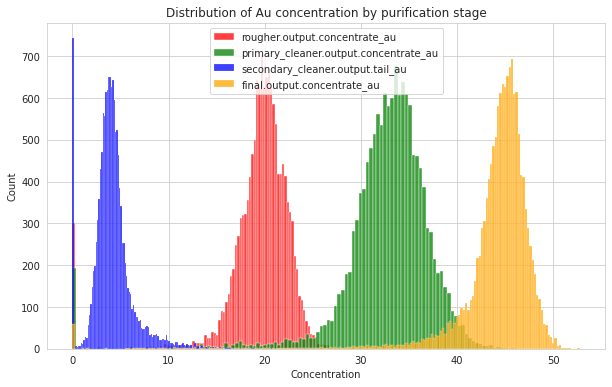

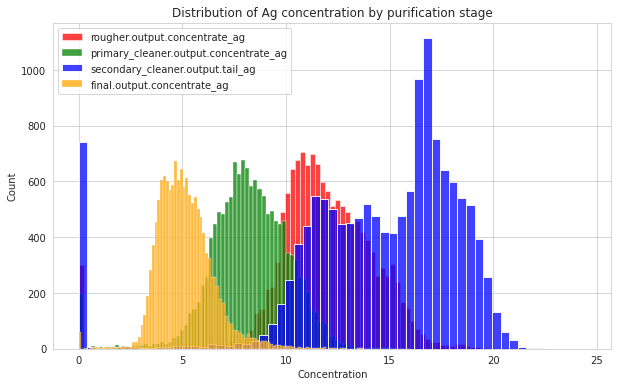

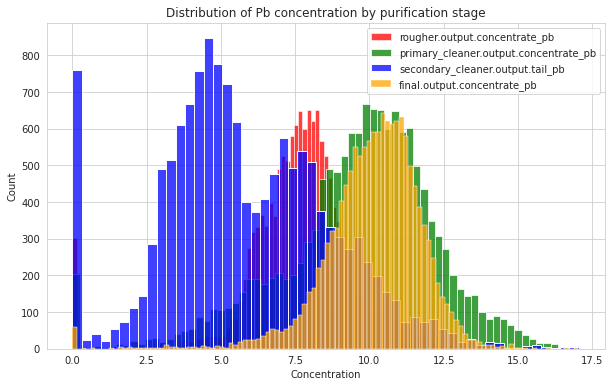

In [70]:
# Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage
metals = ['au', 'ag', 'pb']

for i in metals:
    plot_metal_concentration(i)

For our data analysis, first we take a look at how concentrations of the metals change due to purification stages. We create a function that plots histograms to get a visualization of the distributions per metal (Au, Ag, Pb).

For Au, the counts generally stay consistent at each stage. At the second stage of the cleaner process, the concentration becomes significantly positively skewed, before the final output becomes negatively skewed.

For Ag, the distributions of the concentrations at each stage are a reverse of Au (at the second stage of the cleaner process, the concentration becomes significantly negatively skewed, before the final output becomes positively skewed). The counts generally stay consistent as well at each stage, with one difference: at the second stage of the cleaner process, the concentration has a much wider spread and higher maximum values as compared to the other stages.

For Pb, (and like Ag) the counts generally stay consistent at each stage (with the exception of the secondary cleaner). Like Au, the rougher and first stage cleaner process concentrations have distrubitions ordered one after the other. The key difference here, and unlike Au, the final concentration overlaps the distribution of the primary cleaner's. Like Au, the secondary cleaner is positively skewed, although its shape is an inverse of Pb's secondary cleaner distribution, along with higher maximum values than the rest of the other stages.

### Feed size (training vs. test set)

In [71]:
def plot_feed_size(stage):
    plt.figure(figsize=(10,6))
    sns.histplot(
        data=df_recovery_train[stage],
        stat='density',
        color=colors[2]
    )
    sns.histplot(
        data=df_recovery_test[stage],
        stat='density',
        color=colors[3]
    )
    plt.title(f'Distribution of feed particle size for {stage}')
    plt.xlabel('Feed size')
    plt.legend(['Training set', 'Test set'])
    plt.show()

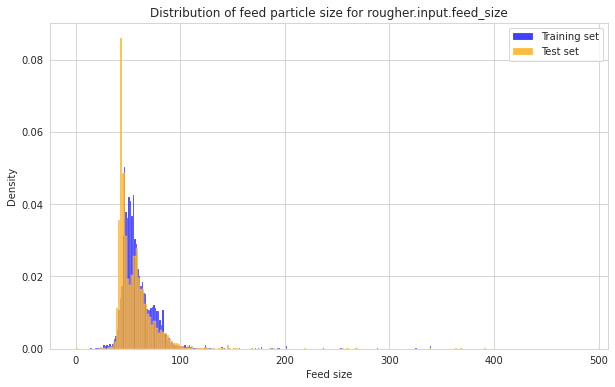

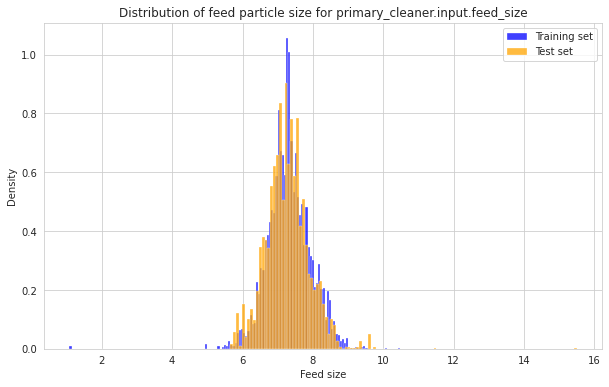

In [72]:
# Compare the feed particle size distributions in the training set and in the test set
plot_feed_size('rougher.input.feed_size')
plot_feed_size('primary_cleaner.input.feed_size')

Next, we look at the feed particle size distributions between the training and test sets. We create a function to plot histograms to get a visualization of comparison between each set's rougher input feed size, followed by each set's primary cleaner input feed size.

There is a little more variation between the sets with regards to the distribution of rougher feed size--the test set has larger maximum density values and looks to be more positively-skewed compared to the shape of the training set, although the spread of feed sizes look very similar overall.

We don't see any significant variations in the distributions for feed size when looking at primary cleaner between the sets in the second histogram, so we continue to our model evaluation.

### Total concentrations & different stages

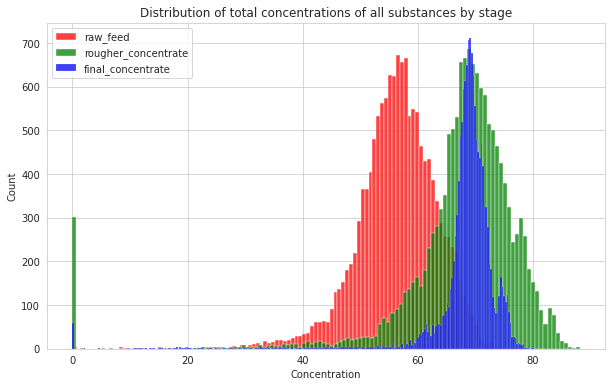

In [73]:
# Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate
sum_raw_feed = df_recovery_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
sum_rougher_concentrate = df_recovery_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
sum_final_concentrate = df_recovery_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

plt.figure(figsize=(10,6))
sns.histplot(
    data=sum_raw_feed,
    color=colors[0]
)
sns.histplot(
    data=sum_rougher_concentrate,
    color=colors[1]
)
sns.histplot(
    data=sum_final_concentrate,
    color=colors[2]
)
plt.title(f'Distribution of total concentrations of all substances by stage')
plt.xlabel('Concentration')
plt.legend(['raw_feed', 'rougher_concentrate', 'final_concentrate'])
plt.show()

Finally, we look at the total concentrations of all the substances in question (Au, Ag, Pb, Sol) at different stages: raw feed, rougher concentrate, and final concentrate. We plot histograms to get a visualization of the distributions and see _almost_ symmetrical shapes (with final concentrate being the closest). All concentrations are on the higher end of the plot.

In [74]:
# Drop zero values from rougher and final concentrations
rougher_concentrate_features = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
final_concentrate_features = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']

rougher_mask = (df_recovery_train[rougher_concentrate_features] < 0.01).any(axis=1)
final_mask = (df_recovery_train[final_concentrate_features] < 0.01).any(axis=1)

df_recovery_train.drop(df_recovery_train[rougher_mask].index, inplace=True)
df_recovery_train.drop(df_recovery_train[final_mask].index, inplace=True)

/tmp/ipykernel_34/292092873.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_recovery_train.drop(df_recovery_train[final_mask].index, inplace=True)


We notice abnormal values in the zero value counts in the total distribution for rougher and final concentrations (with substantially more zeros in the former). We determine that it's worth removing these values from our samples before moving forward.

## Machine learning

### sMAPE evaluation metric

<!-- We need to predict two (target) values:

1. rougher concentrate recovery `rougher.output.recovery`
2. final concentrate recovery `final.output.recovery` -->

In [75]:
def smape(target, predicted):
    return np.nanmean(np.abs(target - predicted)/((np.abs(target) + np.abs(predicted))/2)) * 100

In [76]:
def final_smape(target, predicted):
    smape_rougher_out = smape(target[:,0], predicted[:,0])
    smape_final_out = smape(target[:,1], predicted[:,1])
    return ((0.25 * smape_rougher_out) + (0.75 * smape_final_out))

In [77]:
# Convert our final_smape function to the scorer
# Set greater_is_better correctly to avoid optimizing
# for the worst model instead of the best when using GridSearchCV
smape_scoring = make_scorer(final_smape, greater_is_better=False)

As a new evaluation metric for this project, we'll be leveraging sMAPE (symmetric Mean Absolute Percentage Error), which is similar to MAE but expressed in relative values (instead of absolute ones). sMAPE takes into account the scale of both the target and the prediction.

First we turn a few formulas into functions, one for calculating sMAPE and another for calculating final sMAPE, and lastly converting the latter to a scorer to make it applicable for cross-validation later on.

### Develop and train models

#### Linear regression

In [78]:
# Train the model
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

# Find predictions
predicted_lr = model_lr.predict(features_train)

initial_lr = smape(target_train, predicted_lr)
print(f'Linear regression model initial sMAPE: {initial_lr}')

result_lr = final_smape(target_train, predicted_lr)
print(f'Linear regression model final sMAPE: {result_lr}')

Linear regression model initial sMAPE: 9.549197297454803
Linear regression model final sMAPE: 9.82565452051473


#### Decision tree regression

In [79]:
# Hyperparamter tuning optimization w/ automation
parameters_dt = {
    'max_depth': range(1, 11)
}

model_dt = DecisionTreeRegressor(random_state=12345)
clf = GridSearchCV(model_dt, param_grid=parameters_dt, scoring=smape_scoring, verbose=2)
clf.fit(features_train, target_train)

print(f'Best score for decision tree model on the training set: {clf.best_score_}')
print(f'Best params for decision tree model on the training set: {clf.best_params_}')

In [80]:
# Train the model
model_dt = DecisionTreeRegressor(max_depth=5, random_state=12345)
model_dt.fit(features_train, target_train)

# Find predictions
predicted_dt = model_dt.predict(features_train)

# Calculate sMAPE
initial_dt = smape(target_train, predicted_dt)
print(f'Decision tree model initial sMAPE: {initial_dt}')

result_dt = final_smape(target_train, predicted_dt)
print(f'Decision tree model final sMAPE: {result_dt}')

Decision tree model initial sMAPE: 9.153543889220444
Decision tree model final sMAPE: 9.304544653144784


/tmp/ipykernel_34/3631768457.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.abs(target - predicted)/((np.abs(target) + np.abs(predicted))/2)) * 100


#### Random forest regression

In [81]:
# Hyperparamter tuning optimization w/ automation
parameters_rf = {
    'n_estimators': [10, 25, 50],
    'max_depth': [1, 5, 10]
}

model_rf = RandomForestRegressor(random_state=12345)
clf = GridSearchCV(model_rf, param_grid=parameters_rf, scoring=smape_scoring, verbose=2)
clf.fit(features_train, target_train)

print(f'Best score for random forest model on the training set: {clf.best_score_}')
print(f'Best params for random forest model on the training set: {clf.best_params_}')

In [82]:
# Train the model
model_rf = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
model_rf.fit(features_train, target_train)

# Find predictions
predicted_rf = model_rf.predict(features_train)

# Calculate sMAPE
initial_rf = smape(target_train, predicted_rf)
print(f'Random forest model initial sMAPE: {initial_rf}')

result_rf = final_smape(target_train, predicted_rf)
print(f'Random forest model final sMAPE: {result_rf}')

Random forest model initial sMAPE: 9.00379514176731
Random forest model final sMAPE: 9.2028745759991


Moving onto our models, we develop and train three models: linear regression, decision tree regression, and random forest regression.

For the latter two models, we also carry out hyperparameter tuning beforehand to find the best parameters to train and test the models with. We add automation to the tuning using GridSearchCV.

After training each model and calculating sMAPE, we find that the random forest model provides the lowest final sMAPE value of `9.2%`.

### Cross-validation to evaluate the models

In [83]:
# Calculate scores
scores_lr = cross_val_score(model_lr, features_train, target_train, scoring=smape_scoring)
final_score_lr = np.nanmean(scores_lr)
print(f'Linear regression model scores: {scores_lr}')
print(f'Average linear regression model evaluation score: {final_score_lr}')

Linear regression model scores: [-14.78157811  -8.47597857 -16.03740856 -13.55110067 -10.46987246]
Average linear regression model evaluation score: -12.66318767393687


In [84]:
# Calculate scores
scores_dt = cross_val_score(model_dt, features_train, target_train, scoring=smape_scoring)
final_score_dt = np.nanmean(scores_dt)
print(f'Decision tree model scores: {scores_dt}')
print(f'Average decision tree model evaluation score: {final_score_dt}')

Decision tree model scores: [ -9.81212269  -8.60893153 -14.13551175 -13.83688023  -9.82515475]
Average decision tree model evaluation score: -11.243720192160318


In [85]:
# Calculate scores
scores_rf = cross_val_score(model_rf, features_train, target_train, scoring=smape_scoring)
final_score_rf = np.nanmean(scores_rf)
print(f'Random forest model scores: {scores_rf}')
print(f'Average random forest model evaluation score: {final_score_rf}')

Random forest model scores: [ -9.44579333  -7.13576846 -13.4370344  -14.26751695  -9.40033673]
Average random forest model evaluation score: -10.7372899734763


Next, we want to verify the previous results to make sure that our models are performing well via cross-validation. We calculate scores in order to further evaluate and compare the models, and see the random forest model performing the best with a lowest score of `-10.7`.

### Pick the best model and test

In [86]:
# Pick the best model and test it using the test sample
model_rf = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
model_rf.fit(features_train, target_train)

predicted_valid_rf = model_rf.predict(features_valid)

result_rf = final_smape(target_valid, predicted_valid_rf)
print(f'Random forest model final sMAPE: {result_rf}')

Random forest model final sMAPE: 8.896916897954306


Now we take the best model based on cross-validation, random forest, and test it again using the test sample to check the model for accuracy. We run the model against our data to come up with a final sMAPE score. This time, the random forest model evaluates to an average score of `8.9%` (an improvement over our previous final sMAPE score of `9.2%` for the same model).

### Sanity check

In [87]:
# Create the model
model_dummy = DummyRegressor(strategy='mean')

# Train the model
model_dummy.fit(features_train, target_train)

# Find predictions
predicted_dummy = model_dummy.predict(features_valid)

# Calculate score
result_dummy = final_smape(target_valid, predicted_dummy)
print(f'Dummy regression model final sMAPE: {result_dummy}')

Dummy regression model final sMAPE: 10.349742980966006


Finally, we implement a dummy regression model on our training set as a sanity check in order to provide baseline performance against our models. The dummy model results in a final sMAPE value of `10.3%`, which fares slightly worse than our best (random forest) model's final sMAPE value of of `9.2%`. Based on our comparison to a baseline, we accept the results of our sanity check vs. best model.

## Conclusion

We were able to develop and train models on our datasets and come up with a recommendation of using our **random forest model** to provide Zyfra with the best option for predicting how much gold can be recovered from ore, as determined by its smallest sMAPE and cross-validation evaluation scores against the data provided and when compared to the other models tested.